In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To analyze consumer trends and interests by looking at the type of purchases people make based on their gender and city.

#To detect potential credit card fraud or malicious activity, such as by analyzing changes in spending habits or unusual 
#purchases, by city and gender.

#To predict spending patterns for promotional campaigns, such as during festivals or holidays, in order to better target 
#customer segments according to city and gender based spending habits

In [3]:
df=pd.read_csv('Credit card transactions - India - Simple.csv')
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
print(len(set(df['City'])))
print(len(set(df['Card Type'])))
print(len(set(df['Exp Type'])))

986
4
6


# EDA

<AxesSubplot:>

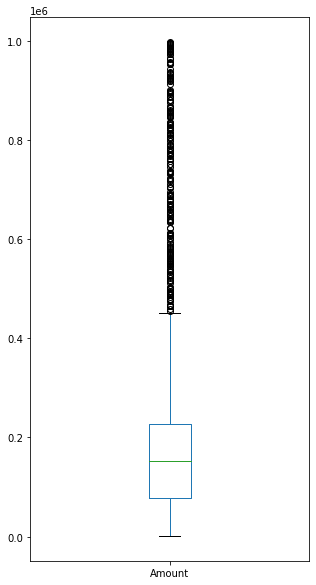

In [6]:
plt.figure(figsize=(5,10))
df['Amount'].plot.box()

<AxesSubplot:xlabel='Card Type', ylabel='count'>

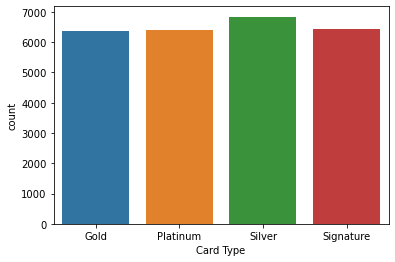

In [7]:
sns.countplot(x='Card Type', data = df)

<AxesSubplot:xlabel='Exp Type', ylabel='count'>

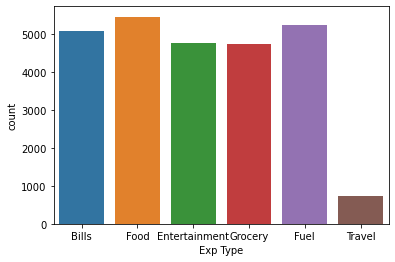

In [8]:
sns.countplot(x='Exp Type', data = df)

<AxesSubplot:xlabel='Date_ym', ylabel='count'>

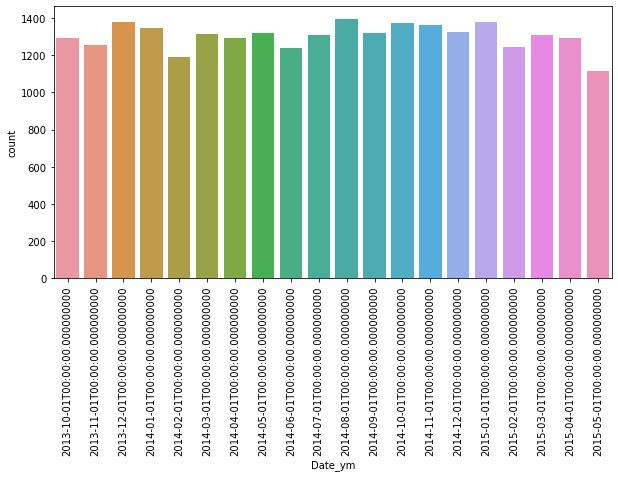

In [9]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%b-%y')
df['Date_ym'] = pd.to_datetime(df['Date'].dt.to_period('M').astype(str))

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.countplot(x='Date_ym', data = df.sort_values(by='Date_ym'))

<AxesSubplot:xlabel='Date_ym'>

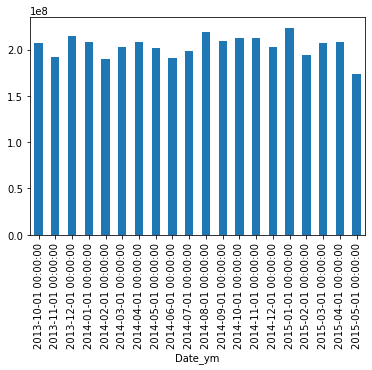

In [10]:
df.groupby('Date_ym')['Amount'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

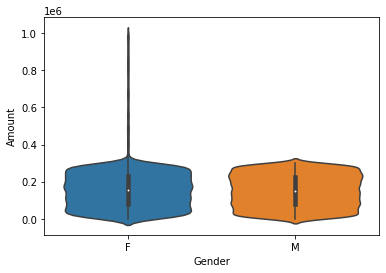

In [11]:
sns.violinplot(x = 'Gender', y = 'Amount', data = df)

<AxesSubplot:xlabel='Card Type', ylabel='Amount'>

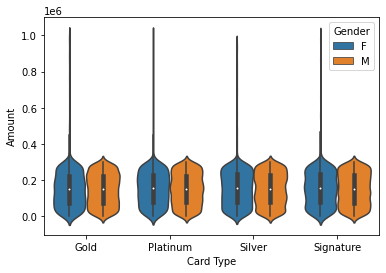

In [12]:
sns.violinplot(x = 'Card Type', y = 'Amount', data = df, hue = 'Gender')

<AxesSubplot:xlabel='Exp Type', ylabel='Amount'>

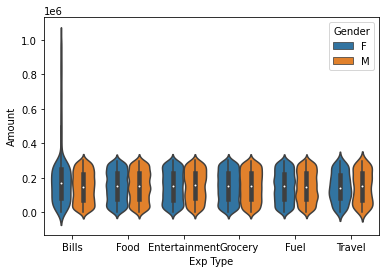

In [13]:
sns.violinplot(x = 'Exp Type', y = 'Amount', data = df, hue = 'Gender')

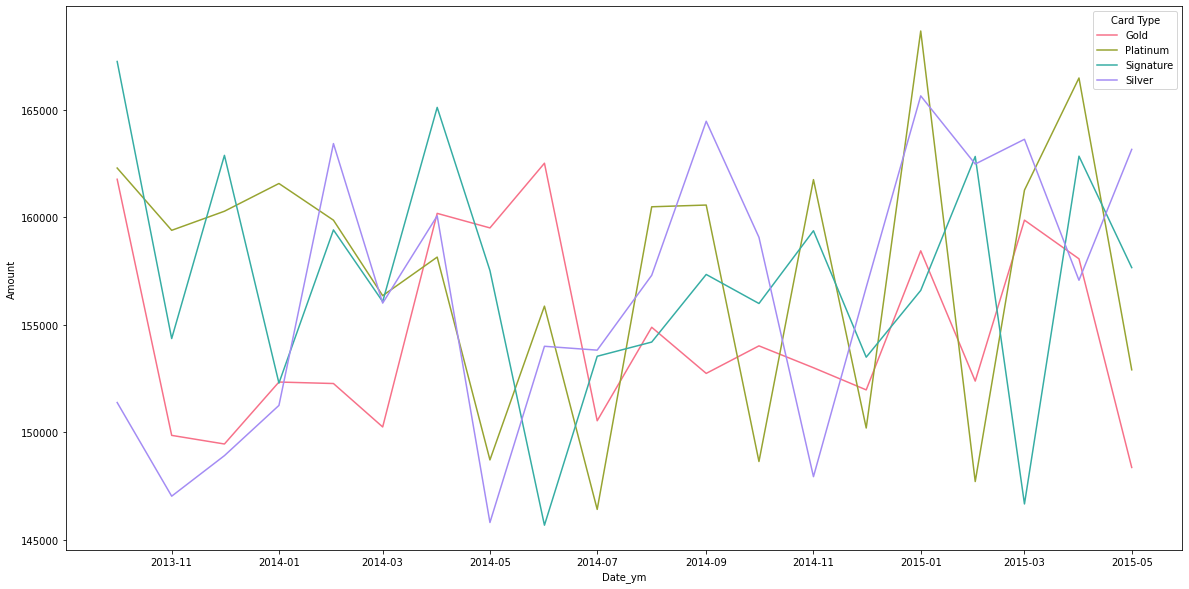

In [14]:
df1=df.groupby(['Date_ym','Card Type'])['Amount'].mean()

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df1.reset_index(), x='Date_ym', y='Amount', hue='Card Type', palette='husl')
plt.show()

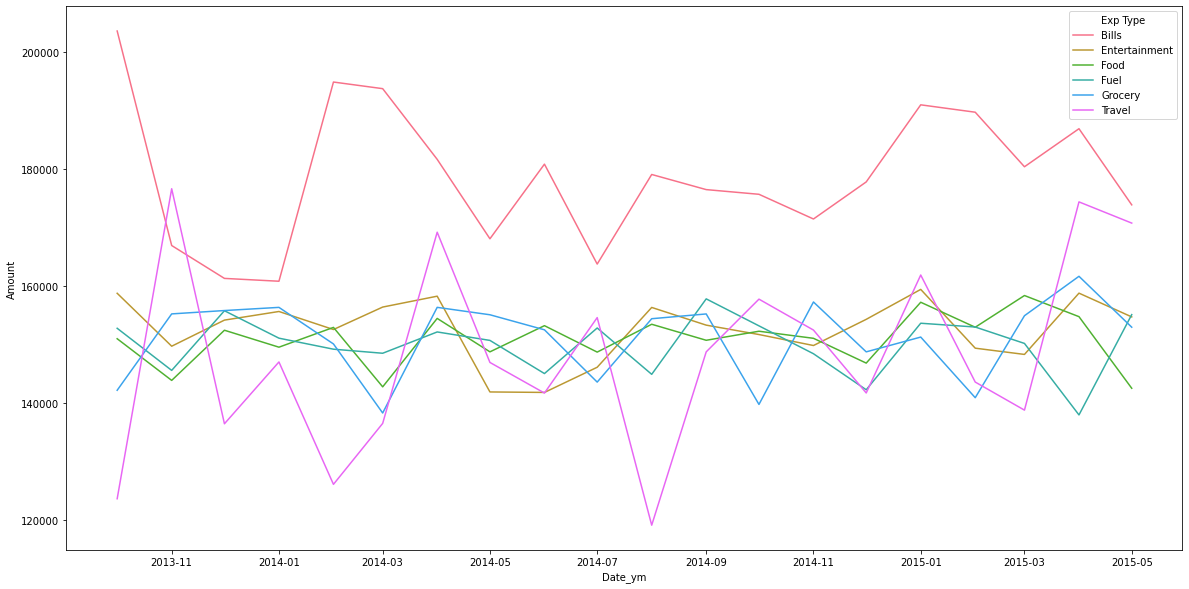

In [15]:
df1=df.groupby(['Date_ym','Exp Type'])['Amount'].mean()

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df1.reset_index(), x='Date_ym', y='Amount', hue='Exp Type', palette='husl')
plt.show()

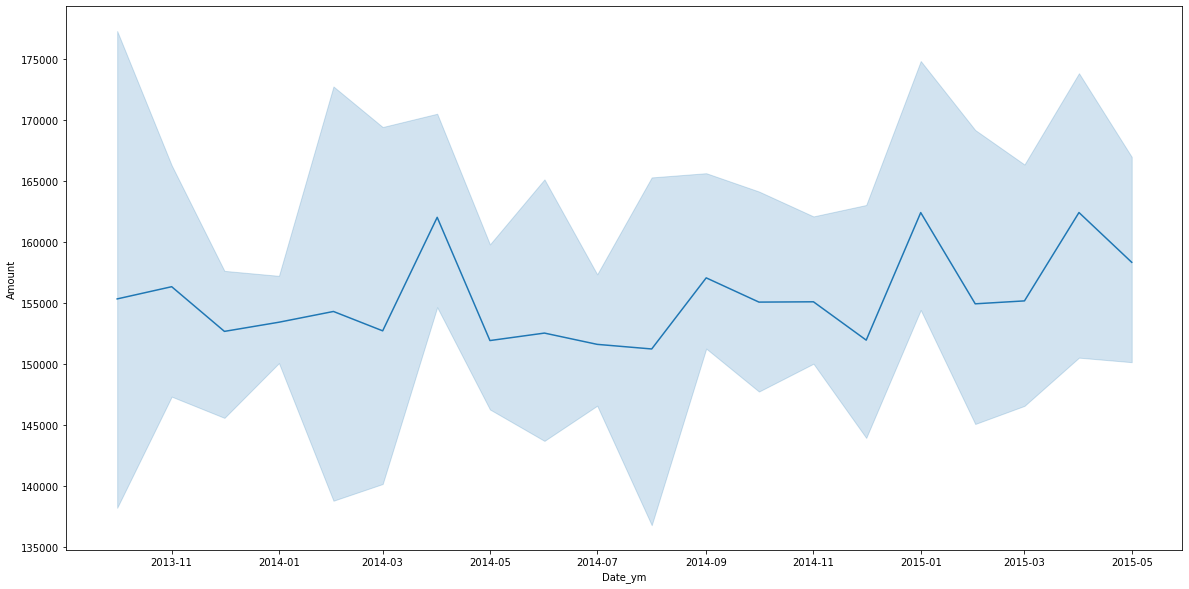

In [16]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df1.reset_index(), x='Date_ym', y='Amount', palette='husl')
plt.show()

In [17]:
df['City'].value_counts().nlargest(20)

Bengaluru, India           3552
Greater Mumbai, India      3493
Ahmedabad, India           3491
Delhi, India               3482
Hyderabad, India            784
Chennai, India              774
Kolkata, India              773
Kanpur, India               764
Lucknow, India              759
Jaipur, India               752
Surat, India                749
Pune, India                 747
Ramnagar, India              19
Kalyan-Dombivali, India      19
Udaipur, India               15
Vijayapura, India            15
Puliyankudi, India           14
Bathinda, India              14
Pratapgarh, India            14
Jind, India                  13
Name: City, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Greater Mumbai'),
  Text(2, 0, 'Bengaluru'),
  Text(3, 0, 'Ahmedabad'),
  Text(4, 0, 'other'),
  Text(5, 0, 'Pune'),
  Text(6, 0, 'Surat'),
  Text(7, 0, 'Chennai'),
  Text(8, 0, 'Lucknow'),
  Text(9, 0, 'Hyderabad'),
  Text(10, 0, 'Kolkata'),
  Text(11, 0, 'Kanpur'),
  Text(12, 0, 'Jaipur')])

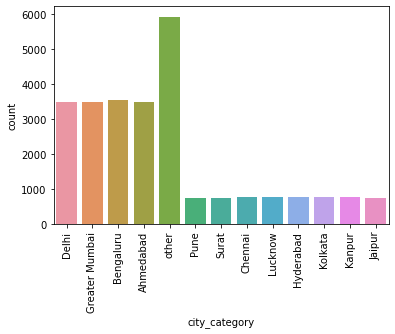

In [18]:
df['City']=df['City'].str.replace(', India', '')

city_name = ['Bengaluru', 'Greater Mumbai', 'Ahmedabad', 'Delhi','Hyderabad','Chennai','Kolkata','Kanpur','Lucknow','Jaipur','Surat','Pune']
def match(str):
    if str in city_name:
        return str
    else: return 'other'

df['city_category']=df['City'].map(match)


sns.countplot(x='city_category', data = df)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Greater Mumbai'),
  Text(2, 0, 'Bengaluru'),
  Text(3, 0, 'Ahmedabad'),
  Text(4, 0, 'other'),
  Text(5, 0, 'Pune'),
  Text(6, 0, 'Surat'),
  Text(7, 0, 'Chennai'),
  Text(8, 0, 'Lucknow'),
  Text(9, 0, 'Hyderabad'),
  Text(10, 0, 'Kolkata'),
  Text(11, 0, 'Kanpur'),
  Text(12, 0, 'Jaipur')])

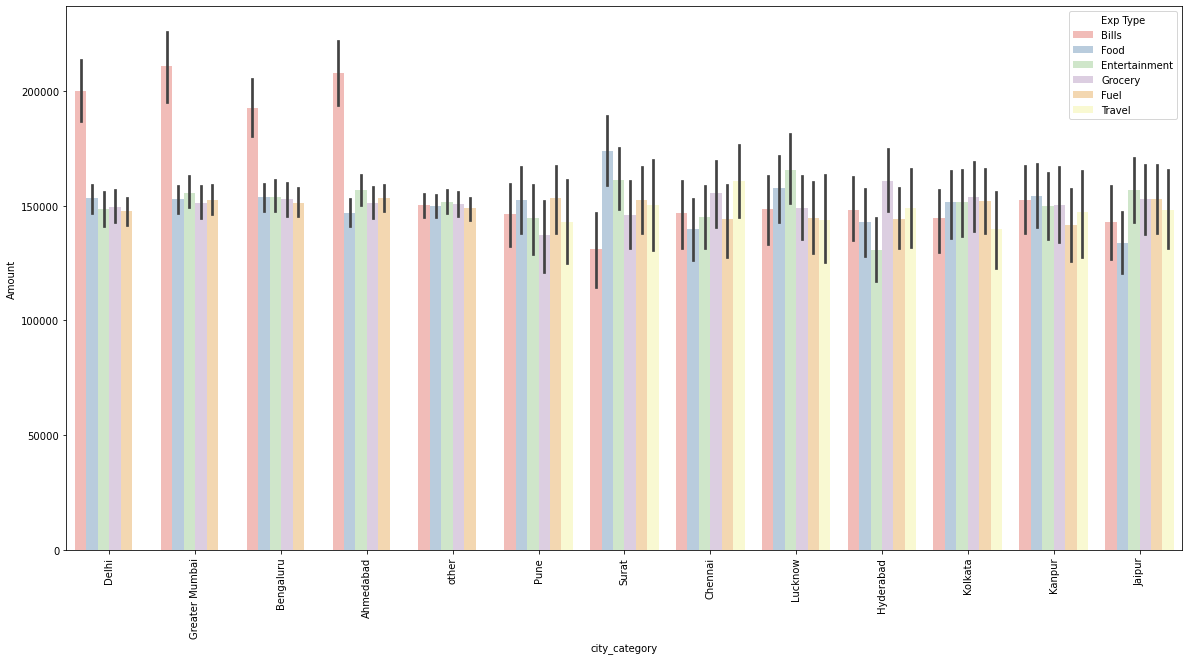

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'city_category',
            y = 'Amount',
            hue = 'Exp Type',
            data = df,
            palette = "Pastel1"
           )
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='city_category'>

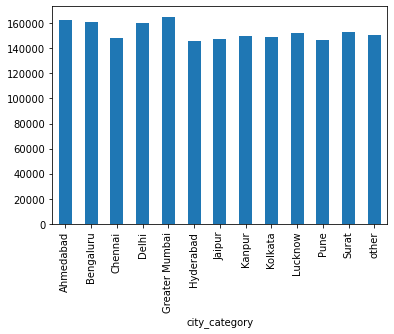

In [20]:
df.groupby('city_category')['Amount'].mean().plot(kind='bar')

In [21]:
df= df.drop(columns=['index','Date','City'])

def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day
df['Date_ym']= df['Date_ym'].map(to_integer)

In [22]:
df2=pd.get_dummies(df,prefix='is', dtype=None)

<AxesSubplot:>

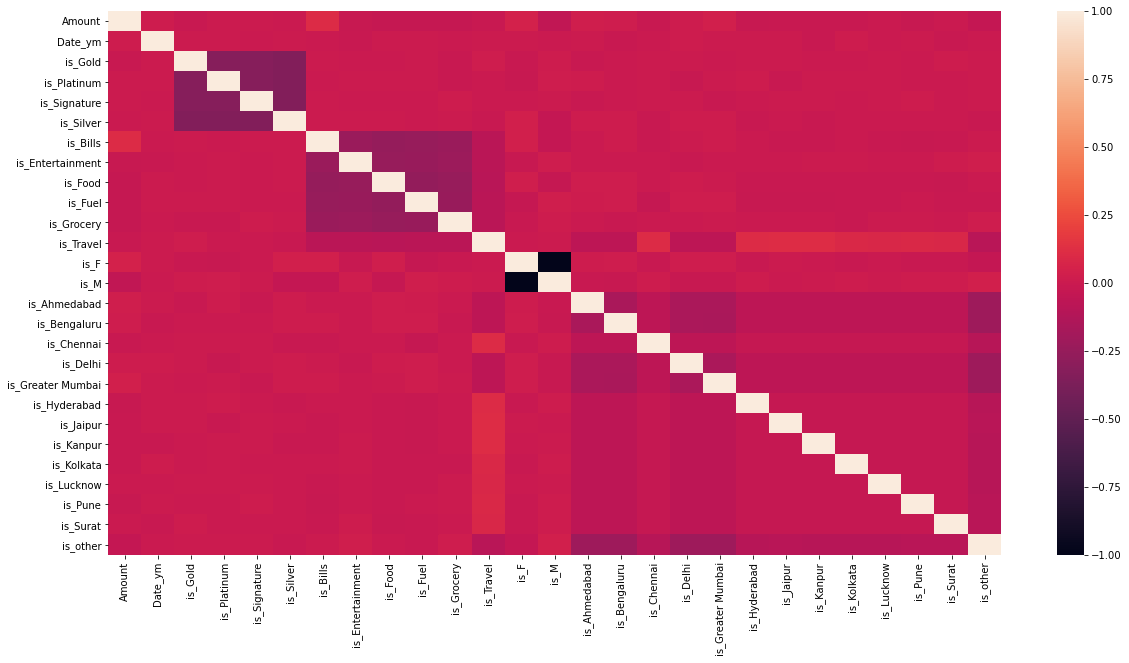

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr())

# Lazy Predict

In [24]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [25]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [26]:
def Range(var):
        if var <= 10000 :
            return 'Low'
        elif var >10000 and var <=50000:
            return 'Medium'
        else:
            return 'High'    

df['amount_range']= df['Amount'].apply(Range)

In [27]:
x= df[['city_category', 'Card Type', 'Exp Type', 'Gender', 'Date_ym']]
y= df[['amount_range']]
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size= 0.2, random_state=42)

LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.
From: https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b#:~:text=Label%20Encoder%3A&text=LabelEncoder%20encode%20labels%20with%20a,value%20to%20as%20assigned%20earlier.

In [28]:
from sklearn.preprocessing import LabelEncoder

label_cols_x = ['city_category', 'Card Type', 'Exp Type', 'Gender', 'Date_ym' ]
label_cols_y = ['amount_range' ]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train_x ,test_x = label_encoder(train_x ,test_x ,label_cols_x)
train_y ,test_y = label_encoder(train_y ,test_y ,label_cols_y)

In [29]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=42,
                     classifiers='all')

models, predictions = clf.fit(train_x , test_x , train_y , test_y)

 90%|████████▉ | 26/29 [01:42<00:23,  7.86s/it]

[12:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [01:45<00:00,  3.64s/it]


In [30]:
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.83,0.33,None,0.76,0.04
RidgeClassifierCV,0.83,0.33,None,0.76,0.08
BernoulliNB,0.83,0.33,None,0.76,0.05
CalibratedClassifierCV,0.83,0.33,None,0.76,5.11
DummyClassifier,0.83,0.33,None,0.76,0.04
LinearSVC,0.83,0.33,None,0.76,1.67
QuadraticDiscriminantAnalysis,0.83,0.33,None,0.76,0.05
RidgeClassifier,0.83,0.33,None,0.76,0.08
LogisticRegression,0.83,0.33,None,0.76,0.25


# K-Mode

In [31]:
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df3= df.drop(columns=['Amount','Date_ym','amount_range'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 72293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 72293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 72293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 72293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 72293.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5511, cost: 62921.0
Run 1, iteration: 2/100, moves: 2441, cost: 62921.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 59440.0
Init: initializing c

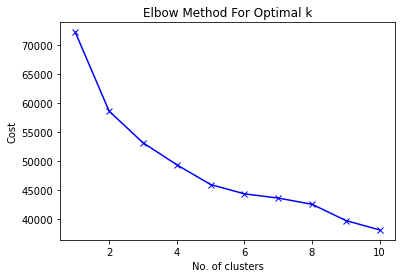

In [40]:
#Elbow Method: Will take a while to run

'''cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df3)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()'''

In [128]:
df3= df.drop(columns=['Amount','Date_ym','amount_range'])
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df3)
df3.insert(0, "Cluster", clusters, True)
df3['Amount'] = df['Amount']

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 921, cost: 52312.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 50092.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1223, cost: 52139.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1515, cost: 50302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1218, cost: 52324.0
Best run was number 2


<AxesSubplot:xlabel='Cluster'>

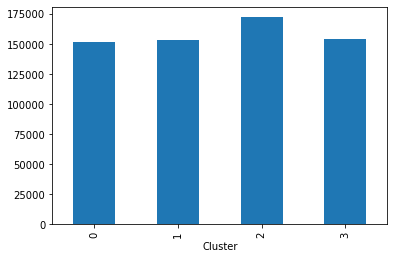

In [129]:
df3.groupby('Cluster')['Amount'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

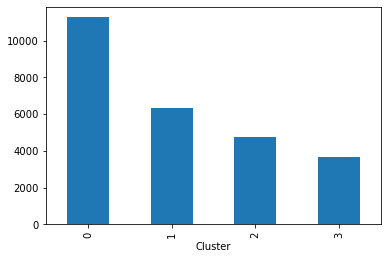

In [130]:
df3.groupby('Cluster')['Amount'].count().plot(kind='bar')